In [4]:
import itertools
import random
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path 
import sys
import threading
import os
from IPython.display import clear_output
from collections import Counter
import powerlaw

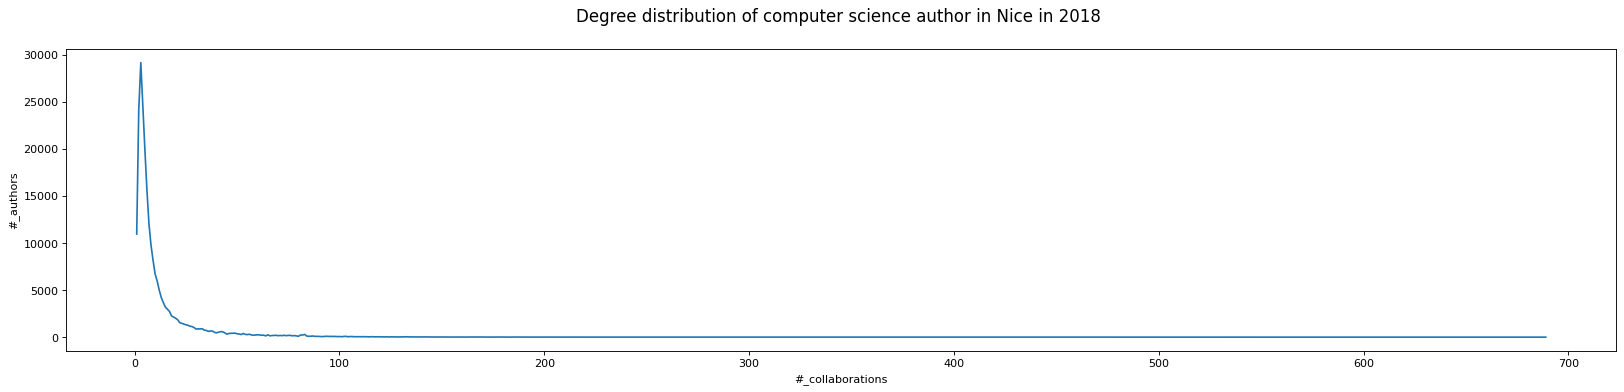

In [12]:
df = pd.read_csv('myDATA/00-collaboration_df.csv')
df = df[df["2018"] != 0 ]
collabs = df["2018"].values

## Degree Distribution for the whole dataset 
distribution = Counter(collabs)
distribution = dict(sorted(distribution.items()))
x = list(distribution.keys())
y = list(distribution.values())

plt.figure(figsize=(25, 5), dpi=80)
plt.xlabel("#_collaborations")
plt.ylabel("#_authors")
plt.title("Degree distribution of computer science author in Nice in 2018 \n", fontdict = {'fontsize' : 15})
plt.plot(x,y)

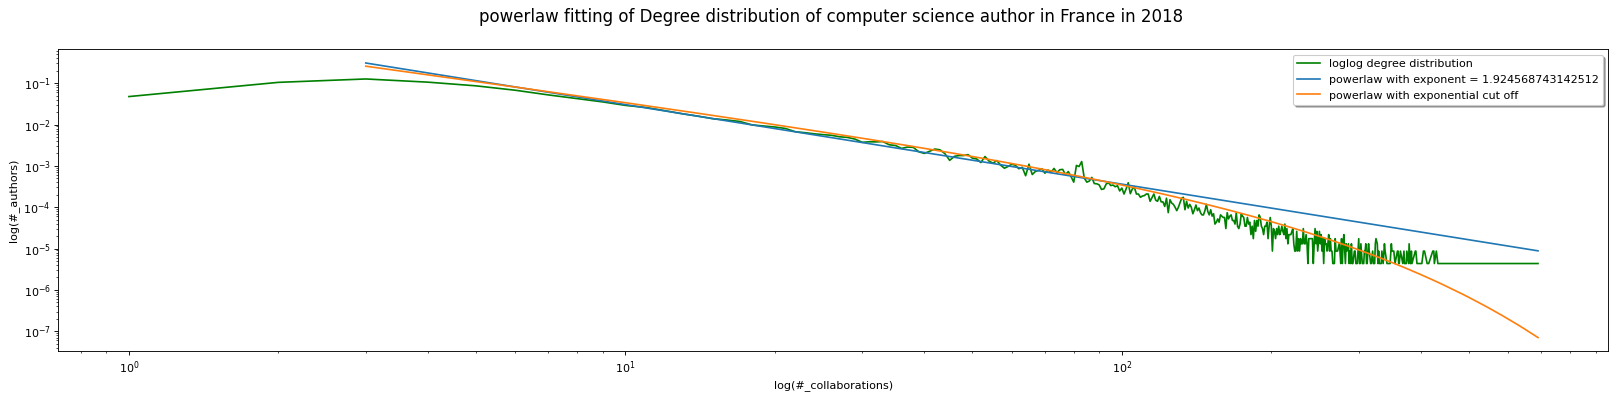

In [10]:
## Documentation https://pythonhosted.org/powerlaw/

df = pd.read_csv('myDATA/00-collaboration_df.csv')
df = df[df["2018"] != 0 ]

collabs = df["2018"].values
fit = powerlaw.Fit(collabs, xmin=3)

distribution = Counter(collabs)
distribution = dict(sorted(distribution.items()))
distribution = {x: y / sum(distribution.values()) for x, y in distribution.items()}

plt.figure(figsize=(25, 5), dpi=80)
plt.xlabel("log(#_collaborations)")
plt.ylabel("log(#_authors)")
plt.title("powerlaw fitting of Degree distribution of computer science author in France in 2018 \n", fontdict = {'fontsize' : 15})

# Plot the observed empirical distribution.
plt.plot(distribution.keys(), distribution.values(), color='g')
# Plot the fitted power-law distribution.
fit.power_law.plot_pdf()
# Plot the fitted power-law distribution with an exponential cutoff.
fit.truncated_power_law.plot_pdf()
plt.legend(["loglog degree distribution", "powerlaw with exponent = " + str(fit.alpha), "powerlaw with exponential cut off"], fancybox=True, shadow=True,)